In [1]:
# Import the required packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# set directory as per your file folder path
#os.chdir("d:/k2analytics/datafile")

# read the file
df = pd.read_csv("E:/K2_Analytics/Works/Data/LR_DF.csv")

In [3]:
df.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C1,0,30,M,160378.60,SAL,2,26-30,826,9.0
1,C10,1,41,M,84370.59,PROF,14,41-45,843,9.0
2,C100,0,49,F,60849.26,PROF,49,46-50,328,26.0
3,C1000,0,49,M,10558.81,SAL,23,46-50,619,19.0
4,C10000,0,43,M,97100.48,NaN,3,41-45,397,8.0


In [23]:
def  double_axischart(var,tar,fill_na=True,bins=10,
                      plot_title='',x_label='',
                      y1_label='',y2_label=''):
    if (df[var].dtype.kind in 'biufc'):
        import numpy as np
        df['decile']=pd.qcut(df[var].rank(method='first'), bins, labels=False)
        if (fill_na== True):
                df['decile'] = df['decile'].fillna(value="Missing")
        ab=df.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[var]),
        np.max(x[var]),
        np.size(x[var]),
        np.sum(x[tar]),
        ],
        index=(["min_val","max_val","total",1])
        )).reset_index()
        
        ab[var] = ab['min_val'].astype('str')+"-"+ab['max_val'].astype('str')
        res = ab[[var,"total",1]].copy()
        res.set_index(var, inplace=True)
    else:
        ab = df.groupby([var,tar]).size().reset_index()
        res = ab.pivot(index=var, columns=tar, values=0)
        res['total'] = res.sum(axis=1)
        if(fill_na==True):
            ab = df.fillna('Nan').groupby([var,tar]).size().reset_index()
            res = ab.pivot(index=var, columns=tar, values=0)
            res['total'] = res.sum(axis=1)
    res['prob'] = round(res[1]*100/res['total'],2)
    
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [15, 15]
    fig = plt.figure()
    ax = res[['total']].plot(kind='bar', use_index=True)
    plt.suptitle(plot_title, fontsize=20)
    plt.legend('')
    plt.xlabel(x_label, fontsize=18)
    plt.ylabel(y1_label, fontsize=16)
    ax2 = ax.twinx()
    ax2.plot(res['prob'], linestyle='-', marker='o', linewidth=2.0,color="#ff8400")
    for i,j in res.prob.items():
        ax2.annotate(str(j)+'%', xy=(i, j))
    plt.ylabel(y2_label, fontsize=16)
   
    return plt.show()


<Figure size 1080x1080 with 0 Axes>

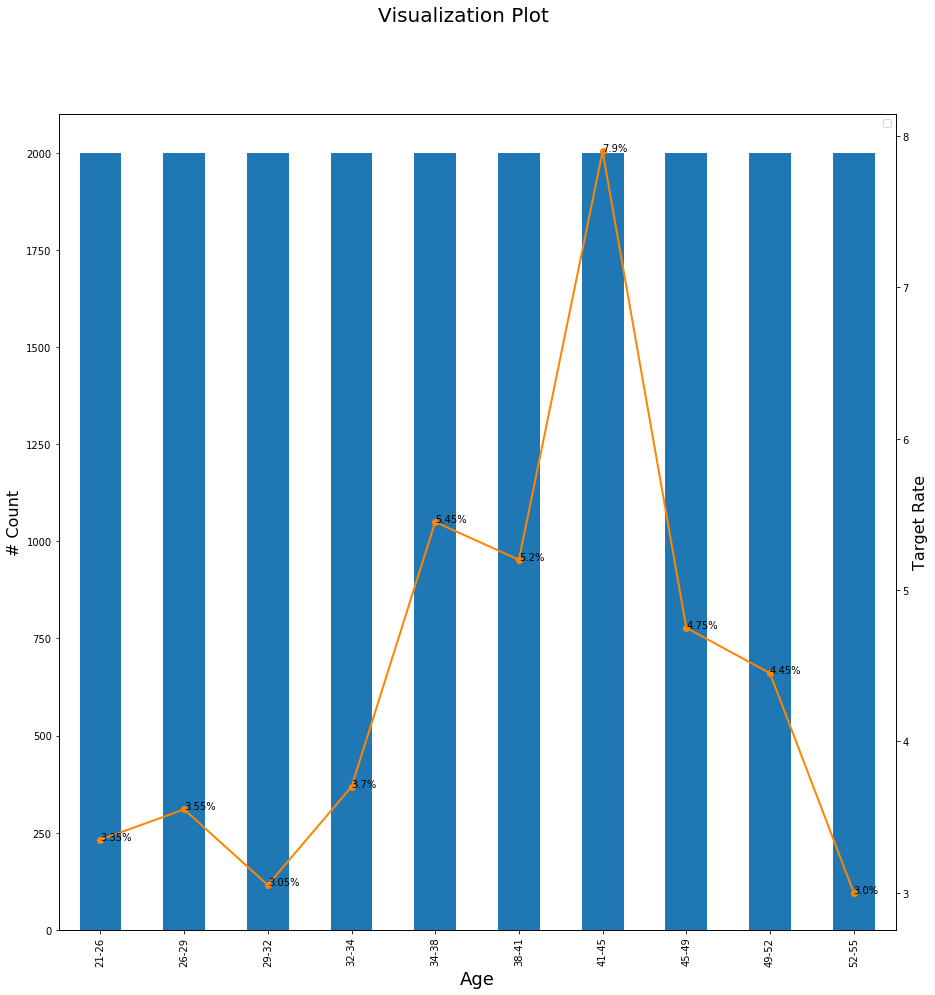

In [24]:
double_axischart("Age","Target",plot_title="Visualization Plot",x_label ='Age',
                 y1_label='# Count', y2_label= 'Target Rate')

In [26]:
from ipywidgets import widgets, interactive
#Creating Widget
Variable = widgets.Dropdown(
    options=list(df.loc[:, 'Age':'Holding_Period'].columns),
    value='Age',
    description='Variable',
)
Variable

Dropdown(description='Variable', options=('Age', 'Gender', 'Balance', 'Occupation', 'No_OF_CR_TXNS', 'AGE_BKT'…

In [27]:
#Plotting
interactive(double_axischart,var=Variable,tar="Target")

interactive(children=(Dropdown(description='Variable', options=('Age', 'Gender', 'Balance', 'Occupation', 'No_…